COMP3522 Project \\
Comparison of Bus Prices between Regions in Hong Kong


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# BUS DATA SET

## 1. LOAD DATA




In [ ]:
routes = pd.read_csv('/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/ROUTE.csv')

routes.head()

,ROUTE_ID,COMPANY_CODE,DISTRICT,ROUTE_NAMEC,ROUTE_NAMES,ROUTE_NAMEE,ROUTE_TYPE,SERVICE_MODE,SPECIAL_TYPE,JOURNEY_TIME,...,LOC_START_NAMES,LOC_START_NAMEE,LOC_END_NAMEC,LOC_END_NAMES,LOC_END_NAMEE,HYPERLINK_C,HYPERLINK_S,HYPERLINK_E,FULL_FARE,LAST_UPDATE_DATE
0,1001,KMB,NaN,1,1,1,1,R,0,40.0,...,竹园邨,CHUK YUEN ESTATE,尖沙咀碼頭,尖沙咀码头,STAR FERRY,https://search.kmb.hk/KMBWebSite/?action=route...,https://search.kmb.hk/KMBWebSite/?action=route...,https://search.kmb.hk/KMBWebSite/?action=route...,6.7,01/02/25 00:00:00
1,1002,KMB,NaN,10,10,10,1,R,0,55.0,...,彩云,CHOI WAN,大角咀(循環線),大角咀(循环线),TAI KOK TSUI (CIRCULAR),https://search.kmb.hk/KMBWebSite/?action=route...,https://search.kmb.hk/KMBWebSite/?action=route...,https://search.kmb.hk/KMBWebSite/?action=route...,5.6,12/13/24 00:00:00
2,1006,KMB+CTB,NaN,102P,102P,102P,1,T,1,64.0,...,筲箕湾,SHAU KEI WAN,美孚,美孚,MEI FOO,https://search.kmb.hk/KMBWebSite/?action=route...,https://search.kmb.hk/KMBWebSite/?action=route...,https://search.kmb.hk/KMBWebSite/?action=route...,12.9,06/18/23 00:00:00
3,1008,KMB+CTB,NaN,103,103,103,1,R,0,59.0,...,竹园邨,CHUK YUEN ESTATE,蒲飛路,蒲飞路,POKFIELD RD,https://search.kmb.hk/KMBWebSite/?action=route...,https://search.kmb.hk/KMBWebSite/?action=route...,https://search.kmb.hk/KMBWebSite/?action=route...,12.9,11/04/24 00:00:00
4,1010,KMB+CTB,NaN,106,106,106,1,R,0,82.0,...,黄大仙,Wong Tai Sin,小西灣(藍灣半島),小西湾(蓝湾半岛),Siu Sai Wan (Island Resort),https://search.kmb.hk/KMBWebSite/?action=route...,https://search.kmb.hk/KMBWebSite/?action=route...,https://search.kmb.hk/KMBWebSite/?action=route...,12.9,09/30/24 00:00:00


In [ ]:
company=pd.read_csv('/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/COMPANY_CODE.csv')
company.head()

,COMPANY_CODE,COMPANY_NAMEC,COMPANY_NAMES,COMPANY_NAMEE,DESCRIPTION
0,DB,愉景灣巴士,愉景湾巴士,DB,Discovery Bay Bus
1,XB,落馬洲/皇崗過境巴士,落马洲/皇岗过境巴士,XB,Lok Ma Chau Cross Boundary Coach
2,KMB,九巴,九巴,KMB,Kowloon Motor Bus
3,LWB,龍運巴士,龙运巴士,LWB,Long Win Bus
4,NLB,新大嶼山巴士,新大屿山巴士,NLB,New Lantao Bus


In [ ]:
rstop = pd.read_csv('/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/RSTOP.csv')
rstop['STOP_NAMEE'] = rstop['STOP_NAMEE'].str.upper()
rstop['STOP_NAMEE'] = rstop['STOP_NAMEE'].apply(lambda x: x.split('<BR>')[1] if '<BR>' in x else x)
rstop.head()

,ROUTE_ID,ROUTE_SEQ,STOP_SEQ,STOP_ID,STOP_PICK_DROP,STOP_NAMEC,STOP_NAMES,STOP_NAMEE,LAST_UPDATE_DATE
0,1001,1,1,4001,2,竹園邨總站,竹园邨总站,CHUK YUEN ESTATE BUS TERMINUS,02/21/23 00:00:00
1,1001,1,2,4002,3,天虹小學,天虹小学,RAINBOW PRIMARY SCHOOL,02/21/23 00:00:00
2,1001,1,3,4003,3,馬仔坑遊樂場,马仔坑游乐场,MA CHAI HANG RECREATION GROUND,02/21/23 00:00:00
3,1001,1,4,4004,3,摩士公園,摩士公园,MORSE PARK,02/21/23 00:00:00
4,1001,1,5,4005,3,摩士公園體育館,摩士公园体育馆,MORSE PARK SPORTS CENTRE,02/21/23 00:00:00


In [ ]:
stop = pd.read_csv('/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/STOP.csv')

stop.head()

,STOP_ID,STOP_TYPE,X,Y,LAST_UPDATE_DATE,STOP_CODE
0,2,1,843622,813951,02/02/24 00:00:00,NaN
1,3,1,843333,814109,03/04/23 00:00:00,NaN
2,4,1,842947,814013,03/04/23 00:00:00,NaN
3,5,1,842646,813814,03/04/23 00:00:00,NaN
4,6,1,842419,813736,03/04/23 00:00:00,NaN


In [ ]:

# # Install MDB Tools
!apt-get install -y mdbtools

import pandas as pd
import subprocess

def show_tables(path='/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/FARE_BUS.mdb'):
    tables = subprocess.check_output(["mdb-tables", path])
    return tables.decode().split()

def show_data(path='/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/FARE_BUS.mdb', table='<table_name>'):
    tables = subprocess.check_output(["mdb-export", path, table])
    return tables.decode().split('\n')

def convert_df(path, table):
    d = show_data(path, table)
    columns = d[0].split(',')
    data = [i.split(',') for i in d[1:] if i]  # Ensure to filter out empty rows
    df = pd.DataFrame(columns=columns, data=data)
    return df

# Example usage
mdb_file = '/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/FARE_BUS.mdb'
tables = show_tables(mdb_file)

if tables:
    print("Tables in the MDB file:", tables)
    # Use the first table as an example
    table_name = tables[0]  # You can change this to any table name you want
    fare = convert_df(mdb_file, table_name)
    print(f"Data from table '{table_name}':")
    print(fare)
else:
    print("No tables found in the MDB file.")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libmdb3 libmdbsql3
Suggested packages:
  bash-completion
The following NEW packages will be installed:
  libmdb3 libmdbsql3 mdbtools
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 136 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmdb3 amd64 1.0.0+dfsg-1 [68.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmdbsql3 amd64 1.0.0+dfsg-1 [18.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 mdbtools amd64 1.0.0+dfsg-1 [48.3 kB]
Fetched 136 kB in 1s (231 kB/s)
Selecting previously unselected package libmdb3:amd64.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../libmdb3_1.0.0+dfsg-1_amd64.deb ...
Unpacking libmdb3:amd64 (1.0.0+dfsg-1

In [ ]:

# Convert columns to appropriate data types
fare['ROUTE_ID'] = pd.to_numeric(fare['ROUTE_ID'], errors='coerce')  # Keep as string
fare['ROUTE_SEQ'] = pd.to_numeric(fare['ROUTE_SEQ'], errors='coerce')  # Convert to float64, coercing errors to NaN
fare['ON_SEQ'] = pd.to_numeric(fare['ON_SEQ'], errors='coerce')  # Convert to float64, coercing errors to NaN
fare['OFF_SEQ'] = pd.to_numeric(fare['OFF_SEQ'], errors='coerce')  # Convert to float64, coercing errors to NaN
fare['PRICE'] = pd.to_numeric(fare['PRICE'], errors='coerce')  # Convert to float64, coercing errors to NaN
fare['LAST_UPDATE_DATE'] = fare['LAST_UPDATE_DATE'].astype(str)  # Keep as string if needed

fare.head()

,ROUTE_ID,ROUTE_SEQ,ON_SEQ,OFF_SEQ,PRICE,LAST_UPDATE_DATE
0,1001,1,1,2,6.7,"""01/02/25 00:00:00"""
1,1001,1,1,3,6.7,"""01/02/25 00:00:00"""
2,1001,1,1,4,6.7,"""01/02/25 00:00:00"""
3,1001,1,1,5,6.7,"""01/02/25 00:00:00"""
4,1001,1,1,6,6.7,"""01/02/25 00:00:00"""


In [ ]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755971 entries, 0 to 755970
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ROUTE_ID          755971 non-null  int64  
 1   ROUTE_SEQ         755971 non-null  int64  
 2   ON_SEQ            755971 non-null  int64  
 3   OFF_SEQ           755971 non-null  int64  
 4   PRICE             755971 non-null  float64
 5   LAST_UPDATE_DATE  755971 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 34.6+ MB


## 2. COORDINATES CONVERSION



* Stop coordinates are provided in Hong Kong 1980 Grid system
( reference: https://www.geodetic.gov.hk/tc/gi/grid_index.htm )

In [ ]:
stop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STOP_ID           4411 non-null   int64  
 1   STOP_TYPE         4411 non-null   int64  
 2   X                 4411 non-null   int64  
 3   Y                 4411 non-null   int64  
 4   LAST_UPDATE_DATE  4411 non-null   object 
 5   STOP_CODE         0 non-null      float64
dtypes: float64(1), int64(4), object(1)
memory usage: 206.9+ KB


In [ ]:
converted_stop_data = {
    'ID': stop['STOP_ID'],  # Use STOP_ID as ID
    'Easting': stop['X'],   # Use X as Easting
    'Northing': stop['Y']   # Use Y as Northing
}

# Create a new DataFrame with the converted data
df_converted = pd.DataFrame(converted_stop_data)
print(df_converted.head())
# Display the converted DataFrame
print("Converted Data:")

# Save the converted DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/stop_HK1980.csv'  # Specify your desired file path
df_converted.to_csv(output_file_path, index=False)

print(f"Data saved to {output_file_path}")

   ID  Easting  Northing
0   2   843622    813951
1   3   843333    814109
2   4   842947    814013
3   5   842646    813814
4   6   842419    813736
Converted Data:
Data saved to /content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/stop_HK1980.csv



* Use the WGS84 (ITRF96) Geographic (Latitude / Longitude) format to provide the coordinates for the geodesic calculation, as it's suitable for this type of distance measurement.



In [ ]:
# Covert Easting/Northing to Latitude/Longtitude
converted_coordinates = pd.read_csv('/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/converted_coordinates.csv')
converted_coordinates.head()

,ID,Easting,Northing,Latitude(DDD.DDDD),Longitude(DDD.DDDD)
0,2,843622,813951,22.264361,114.248224
1,3,843333,814109,22.265789,114.245421
2,4,842947,814013,22.264923,114.241675
3,5,842646,813814,22.263127,114.238754
4,6,842419,813736,22.262424,114.236552


In [ ]:
stop_df = pd.merge(stop,converted_coordinates[['ID','Latitude(DDD.DDDD)','Longitude(DDD.DDDD)']], left_on='STOP_ID',right_on='ID',how='inner')
stop_df.head()

,STOP_ID,STOP_TYPE,X,Y,LAST_UPDATE_DATE,STOP_CODE,ID,Latitude(DDD.DDDD),Longitude(DDD.DDDD)
0,2,1,843622,813951,02/02/24 00:00:00,NaN,2,22.264361,114.248224
1,3,1,843333,814109,03/04/23 00:00:00,NaN,3,22.265789,114.245421
2,4,1,842947,814013,03/04/23 00:00:00,NaN,4,22.264923,114.241675
3,5,1,842646,813814,03/04/23 00:00:00,NaN,5,22.263127,114.238754
4,6,1,842419,813736,03/04/23 00:00:00,NaN,6,22.262424,114.236552


## 3. MERGE DATASET

### INNER JOIN RSTOP with STOP


In [ ]:
# Combine route dataset with each stop's latitude adn longtitude
combined = pd.merge(rstop,stop_df[['STOP_ID','Latitude(DDD.DDDD)','Longitude(DDD.DDDD)']], on='STOP_ID',how='inner')
combined.head()

,ROUTE_ID,ROUTE_SEQ,STOP_SEQ,STOP_ID,STOP_PICK_DROP,STOP_NAMEC,STOP_NAMES,STOP_NAMEE,LAST_UPDATE_DATE,Latitude(DDD.DDDD),Longitude(DDD.DDDD)
0,1001,1,1,4001,2,竹園邨總站,竹园邨总站,CHUK YUEN ESTATE BUS TERMINUS,02/21/23 00:00:00,22.345353,114.192446
1,1001,1,2,4002,3,天虹小學,天虹小学,RAINBOW PRIMARY SCHOOL,02/21/23 00:00:00,22.345064,114.190009
2,1001,1,3,4003,3,馬仔坑遊樂場,马仔坑游乐场,MA CHAI HANG RECREATION GROUND,02/21/23 00:00:00,22.344225,114.187776
3,1001,1,4,4004,3,摩士公園,摩士公园,MORSE PARK,02/21/23 00:00:00,22.339718,114.189387
4,1001,1,5,4005,3,摩士公園體育館,摩士公园体育馆,MORSE PARK SPORTS CENTRE,02/21/23 00:00:00,22.337804,114.189901


In [ ]:
# Rename Latitude and Longtitude
combined=combined.rename(columns={
    'Latitude(DDD.DDDD)' :'LATITUDE',
    'Longitude(DDD.DDDD)':'LONGITUDE'

})
combined.head()

,ROUTE_ID,ROUTE_SEQ,STOP_SEQ,STOP_ID,STOP_PICK_DROP,STOP_NAMEC,STOP_NAMES,STOP_NAMEE,LAST_UPDATE_DATE,LATITUDE,LONGITUDE
0,1001,1,1,4001,2,竹園邨總站,竹园邨总站,CHUK YUEN ESTATE BUS TERMINUS,02/21/23 00:00:00,22.345353,114.192446
1,1001,1,2,4002,3,天虹小學,天虹小学,RAINBOW PRIMARY SCHOOL,02/21/23 00:00:00,22.345064,114.190009
2,1001,1,3,4003,3,馬仔坑遊樂場,马仔坑游乐场,MA CHAI HANG RECREATION GROUND,02/21/23 00:00:00,22.344225,114.187776
3,1001,1,4,4004,3,摩士公園,摩士公园,MORSE PARK,02/21/23 00:00:00,22.339718,114.189387
4,1001,1,5,4005,3,摩士公園體育館,摩士公园体育馆,MORSE PARK SPORTS CENTRE,02/21/23 00:00:00,22.337804,114.189901


In [ ]:
# df=merged_df

### LEFT JOIN FARE with COMBINED

In [ ]:
# Merging DataFrames to get coordinates for ON_SEQ and OFF_SEQ
merged_df1 = pd.merge(fare,combined[['ROUTE_ID', 'ROUTE_SEQ', 'STOP_ID','STOP_SEQ','STOP_NAMEE','LATITUDE','LONGITUDE']], left_on=['ROUTE_ID', 'ROUTE_SEQ', 'ON_SEQ'], right_on=['ROUTE_ID', 'ROUTE_SEQ', 'STOP_SEQ'],suffixes=('', '_ON'),how='left')
merged_df2 = pd.merge(merged_df1,combined[['ROUTE_ID', 'ROUTE_SEQ','STOP_ID', 'STOP_SEQ','STOP_NAMEE','LATITUDE','LONGITUDE']] ,left_on=['ROUTE_ID', 'ROUTE_SEQ', 'OFF_SEQ'], right_on=['ROUTE_ID', 'ROUTE_SEQ', 'STOP_SEQ'], suffixes=('', '_OFF'))


In [ ]:
merged_df3=pd.merge(merged_df2,routes[['ROUTE_ID','ROUTE_NAMEE','COMPANY_CODE','SERVICE_MODE','SPECIAL_TYPE']],on='ROUTE_ID', how='inner')
merged_df=pd.merge(merged_df3,company[['COMPANY_CODE','COMPANY_NAMEE','DESCRIPTION']],on='COMPANY_CODE', how='inner')

merged_df.head()

,ROUTE_ID,ROUTE_SEQ,ON_SEQ,OFF_SEQ,PRICE,LAST_UPDATE_DATE,STOP_ID,STOP_SEQ,STOP_NAMEE,LATITUDE,...,STOP_SEQ_OFF,STOP_NAMEE_OFF,LATITUDE_OFF,LONGITUDE_OFF,ROUTE_NAMEE,COMPANY_CODE,SERVICE_MODE,SPECIAL_TYPE,COMPANY_NAMEE,DESCRIPTION
0,1001,1,1,2,6.7,"""01/02/25 00:00:00""",4001,1,CHUK YUEN ESTATE BUS TERMINUS,22.345353,...,2,RAINBOW PRIMARY SCHOOL,22.345064,114.190009,1,KMB,R,0,KMB,Kowloon Motor Bus
1,1001,1,1,3,6.7,"""01/02/25 00:00:00""",4001,1,CHUK YUEN ESTATE BUS TERMINUS,22.345353,...,3,MA CHAI HANG RECREATION GROUND,22.344225,114.187776,1,KMB,R,0,KMB,Kowloon Motor Bus
2,1001,1,1,4,6.7,"""01/02/25 00:00:00""",4001,1,CHUK YUEN ESTATE BUS TERMINUS,22.345353,...,4,MORSE PARK,22.339718,114.189387,1,KMB,R,0,KMB,Kowloon Motor Bus
3,1001,1,1,5,6.7,"""01/02/25 00:00:00""",4001,1,CHUK YUEN ESTATE BUS TERMINUS,22.345353,...,5,MORSE PARK SPORTS CENTRE,22.337804,114.189901,1,KMB,R,0,KMB,Kowloon Motor Bus
4,1001,1,1,6,6.7,"""01/02/25 00:00:00""",4001,1,CHUK YUEN ESTATE BUS TERMINUS,22.345353,...,6,WAI TUNG HOUSE,22.335320,114.191435,1,KMB,R,0,KMB,Kowloon Motor Bus


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755971 entries, 0 to 755970
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ROUTE_ID          755971 non-null  int64  
 1   ROUTE_SEQ         755971 non-null  int64  
 2   ON_SEQ            755971 non-null  int64  
 3   OFF_SEQ           755971 non-null  int64  
 4   PRICE             755971 non-null  float64
 5   LAST_UPDATE_DATE  755971 non-null  object 
 6   STOP_ID           755971 non-null  int64  
 7   STOP_SEQ          755971 non-null  int64  
 8   STOP_NAMEE        755971 non-null  object 
 9   LATITUDE          755971 non-null  float64
 10  LONGITUDE         755971 non-null  float64
 11  STOP_ID_OFF       755971 non-null  int64  
 12  STOP_SEQ_OFF      755971 non-null  int64  
 13  STOP_NAMEE_OFF    755971 non-null  object 
 14  LATITUDE_OFF      755971 non-null  float64
 15  LONGITUDE_OFF     755971 non-null  float64
 16  ROUTE_NAMEE       75

## 4. DROP AIRPORT BUS

In [ ]:
# List of airport bus routes to exclude
airport_routes = [
    "A10", "A11", "A12", "A17", "A20", "A21", "A22", "A23",
    "A25", "A26", "A28", "A29", "A30", "A31", "A32", "A33",
    "A33X", "A34", "A35", "A36", "A37", "A38", "A41", "A41P",
    "A42", "A43", "A43P", "A46", "A47X", "E11", "E11A",
    "E21", "E21D", "E22", "E22A", "E22P", "E22X", "E23",
    "E23A", "E32", "E33", "E33P", "E36", "E36S", "E36P",
    "E37", "E41", "E42", "NA10", "NA11", "NA12", "NA20",
    "NA21", "NA29", "NA30", "NA31", "NA32", "NA33", "NA36",
    "NA37", "NA40", "NA41", "NA43", "NA47", "N11", "N21",
    "N21A", "N23", "N26", "N29", "N30", "N31", "N35", "N42",
    "N42A", "S1", "S56", "S64", "S64X", "B4"
]

# Filter out rows where ROUTE_NAMEE is in the airport_routes list
merged_df = merged_df[~merged_df['ROUTE_NAMEE'].isin(airport_routes)]
print(merged_df.shape)
merged_df.head()


(663919, 22)


,ROUTE_ID,ROUTE_SEQ,ON_SEQ,OFF_SEQ,PRICE,LAST_UPDATE_DATE,STOP_ID,STOP_SEQ,STOP_NAMEE,LATITUDE,...,STOP_SEQ_OFF,STOP_NAMEE_OFF,LATITUDE_OFF,LONGITUDE_OFF,ROUTE_NAMEE,COMPANY_CODE,SERVICE_MODE,SPECIAL_TYPE,COMPANY_NAMEE,DESCRIPTION
0,1001,1,1,2,6.7,"""01/02/25 00:00:00""",4001,1,CHUK YUEN ESTATE BUS TERMINUS,22.345353,...,2,RAINBOW PRIMARY SCHOOL,22.345064,114.190009,1,KMB,R,0,KMB,Kowloon Motor Bus
1,1001,1,1,3,6.7,"""01/02/25 00:00:00""",4001,1,CHUK YUEN ESTATE BUS TERMINUS,22.345353,...,3,MA CHAI HANG RECREATION GROUND,22.344225,114.187776,1,KMB,R,0,KMB,Kowloon Motor Bus
2,1001,1,1,4,6.7,"""01/02/25 00:00:00""",4001,1,CHUK YUEN ESTATE BUS TERMINUS,22.345353,...,4,MORSE PARK,22.339718,114.189387,1,KMB,R,0,KMB,Kowloon Motor Bus
3,1001,1,1,5,6.7,"""01/02/25 00:00:00""",4001,1,CHUK YUEN ESTATE BUS TERMINUS,22.345353,...,5,MORSE PARK SPORTS CENTRE,22.337804,114.189901,1,KMB,R,0,KMB,Kowloon Motor Bus
4,1001,1,1,6,6.7,"""01/02/25 00:00:00""",4001,1,CHUK YUEN ESTATE BUS TERMINUS,22.345353,...,6,WAI TUNG HOUSE,22.335320,114.191435,1,KMB,R,0,KMB,Kowloon Motor Bus


## 5. Distance calculation


In [ ]:
import pandas as pd
from geopy.distance import geodesic

# Function to calculate distance using geodesic
def calculate_distance(row):
    # Define the coordinates as tuples (latitude, longitude)
    start_coords = (row['LATITUDE'], row['LONGITUDE'])
    end_coords = (row['LATITUDE_OFF'], row['LONGITUDE_OFF'])

    # Calculate the geodesic distance
    distance = geodesic(start_coords, end_coords).kilometers  # Distance in kilometers
    return distance

# Apply distance calculation
merged_df['Distance_km'] = merged_df.apply(calculate_distance, axis=1)
# Calculate Fare per km
merged_df.loc[:, 'Fare_per_km'] = merged_df['PRICE'] / merged_df['Distance_km']
merged_df=merged_df[~merged_df['Fare_per_km'].isin([float('inf')])]

print(merged_df.shape)
merged_df.head()


(663600, 24)


,ROUTE_ID,ROUTE_SEQ,ON_SEQ,OFF_SEQ,PRICE,LAST_UPDATE_DATE,STOP_ID,STOP_SEQ,STOP_NAMEE,LATITUDE,...,LATITUDE_OFF,LONGITUDE_OFF,ROUTE_NAMEE,COMPANY_CODE,SERVICE_MODE,SPECIAL_TYPE,COMPANY_NAMEE,DESCRIPTION,Distance_km,Fare_per_km
0,1001,1,1,2,6.7,"""01/02/25 00:00:00""",4001,1,CHUK YUEN ESTATE BUS TERMINUS,22.345353,...,22.345064,114.190009,1,KMB,R,0,KMB,Kowloon Motor Bus,0.253031,26.478922
1,1001,1,1,3,6.7,"""01/02/25 00:00:00""",4001,1,CHUK YUEN ESTATE BUS TERMINUS,22.345353,...,22.344225,114.187776,1,KMB,R,0,KMB,Kowloon Motor Bus,0.496977,13.481522
2,1001,1,1,4,6.7,"""01/02/25 00:00:00""",4001,1,CHUK YUEN ESTATE BUS TERMINUS,22.345353,...,22.339718,114.189387,1,KMB,R,0,KMB,Kowloon Motor Bus,0.699000,9.585128
3,1001,1,1,5,6.7,"""01/02/25 00:00:00""",4001,1,CHUK YUEN ESTATE BUS TERMINUS,22.345353,...,22.337804,114.189901,1,KMB,R,0,KMB,Kowloon Motor Bus,0.876093,7.647590
4,1001,1,1,6,6.7,"""01/02/25 00:00:00""",4001,1,CHUK YUEN ESTATE BUS TERMINUS,22.345353,...,22.335320,114.191435,1,KMB,R,0,KMB,Kowloon Motor Bus,1.115856,6.004357


## 6. Filter >1km and 5 stops

In [ ]:
import pandas as pd

# Assuming `routes` is your DataFrame with LOC_END_NAMEE and other relevant columns
# Example structure of the DataFrame
# routes = pd.DataFrame(...)

# Step 1: Function to filter stops for each route
def filter_stops(df):
    # Keep only the first 10 stops for each ON_SEQ
    first_10_stops = df.head(10)
    # Drop stops where Distance_km is less than 1
    filtered_stops = first_10_stops[first_10_stops['Distance_km'] >= 1]
    return filtered_stops

# Step 2: Apply the filter function to all routes
all_filtered_stops = merged_df.groupby(['ROUTE_ID', 'ON_SEQ']).apply(filter_stops).reset_index(drop=True)

# Step 3: Identify circular routes
circular_routes = routes[routes['LOC_END_NAMEE'].str.contains("circular", case=False, na=False)]
circular_route_ids = circular_routes['ROUTE_ID'].unique()

# Step 4: Create a new DataFrame for the final results
merged_df = pd.DataFrame()

# Step 5: Process each group
for route_id in all_filtered_stops['ROUTE_ID'].unique():
    group = all_filtered_stops[all_filtered_stops['ROUTE_ID'] == route_id]

    if route_id in circular_route_ids:
        # For circular routes, take the first 5 stops
        group = group.head(5)

    # Append the processed group to the final result
    merged_df = pd.concat([merged_df, group])

# Step 6: Reset index of the final result
merged_df = merged_df.reset_index(drop=True)
merged_df = merged_df.sort_values(by='Fare_per_km')
# Print the resulting DataFrame
print("Final Combined Result:")
merged_df

<ipython-input-21-0d7cc91c656a>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_filtered_stops = merged_df.groupby(['ROUTE_ID', 'ON_SEQ']).apply(filter_stops).reset_index(drop=True)


Final Combined Result:


,ROUTE_ID,ROUTE_SEQ,ON_SEQ,OFF_SEQ,PRICE,LAST_UPDATE_DATE,STOP_ID,STOP_SEQ,STOP_NAMEE,LATITUDE,...,LATITUDE_OFF,LONGITUDE_OFF,ROUTE_NAMEE,COMPANY_CODE,SERVICE_MODE,SPECIAL_TYPE,COMPANY_NAMEE,DESCRIPTION,Distance_km,Fare_per_km
15372,1208,1,18,24,0.0,"""01/02/25 00:00:00""",9598,18,SHING MUN TUNNELS BUS INTERCHANGE,22.381381,...,22.363273,114.130533,40X,KMB,R,0,KMB,Kowloon Motor Bus,2.134785,0.000000
118184,8744,1,27,32,0.0,"""06/18/23 00:00:00""",9598,27,SHING MUN TUNNELS BUS INTERCHANGE,22.381381,...,22.364402,114.132737,73P,KMB,T,1,KMB,Kowloon Motor Bus,1.946902,0.000000
118183,8744,1,27,31,0.0,"""06/18/23 00:00:00""",9598,27,SHING MUN TUNNELS BUS INTERCHANGE,22.381381,...,22.370417,114.134696,73P,KMB,T,1,KMB,Kowloon Motor Bus,1.251483,0.000000
118182,8744,1,26,36,0.0,"""06/18/23 00:00:00""",13379,26,SHING MUN TUNNELS BUS INTERCHANGE,22.381309,...,22.358692,114.122079,73P,KMB,T,1,KMB,Kowloon Motor Bus,2.991069,0.000000
9710,1131,1,9,14,0.0,"""08/26/24 00:00:00""",9598,9,SHING MUN TUNNELS BUS INTERCHANGE,22.381381,...,22.370470,114.131007,273P,KMB,T,1,KMB,Kowloon Motor Bus,1.388206,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66852,1971,1,1,2,52.0,"""05/06/20 00:00:00""",1326,1,LAM TIN STATION PUBLIC TRANSPORT INTERCHANGE,22.306991,...,22.312241,114.225208,Kwun Tong - Huanggang (Night),XB,N,0,XB,Lok Ma Chau Cross Boundary Coach,1.051159,49.469218
129237,1000193,1,6,11,63.7,"""10/16/24 00:00:00""",12772,6,DISCOVERY BAY ROAD OPPOSITE BLOCK 15 OF SEABIR...,22.297021,...,22.308381,114.012682,DB08R,DB,N,0,DB,Discovery Bay Bus,1.260410,50.539095
129236,1000193,1,6,10,63.7,"""10/16/24 00:00:00""",12772,6,DISCOVERY BAY ROAD OPPOSITE BLOCK 15 OF SEABIR...,22.297021,...,22.307761,114.016303,DB08R,DB,N,0,DB,Discovery Bay Bus,1.225044,51.998122
129228,1000193,1,5,8,63.7,"""10/16/24 00:00:00""",13270,5,DB PLAZA BUS TERMINUS,22.295264,...,22.303935,114.010222,DB08R,DB,N,0,DB,Discovery Bay Bus,1.217176,52.334255


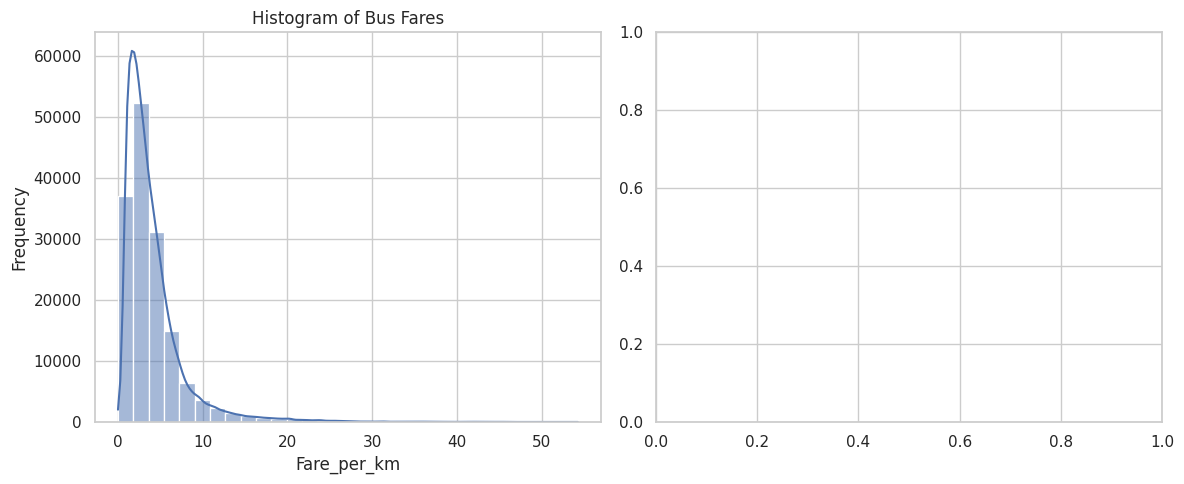

In [ ]:
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(merged_df['Fare_per_km'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Bus Fares')
axes[0].set_xlabel('Fare_per_km')
axes[0].set_ylabel('Frequency')


# Show the plots
plt.tight_layout()
plt.show()

In [ ]:


# Group by STOP_NAMEE, ROUTE_ID, and ROUTE_SEQ, and calculate average fare per km
average_fare_per_bus = merged_df.groupby(['STOP_ID','ROUTE_ID', 'ROUTE_SEQ']).agg({
    'Fare_per_km': 'mean',          # Average fare per km
    'STOP_NAMEE':'first',
    'COMPANY_CODE': 'first',
    'ON_SEQ':'first',
    'OFF_SEQ': 'first',
    'SERVICE_MODE': 'first',
    'SPECIAL_TYPE': 'first',
    'LATITUDE': 'first',           # Retain the first longitude value
    'LONGITUDE': 'first'             # Retain the first latitude value
}).reset_index()

# Print results
print("Average Fare per km for each bus:")
print(average_fare_per_bus.shape)
average_fare_per_bus.head()

Average Fare per km for each bus:
(25816, 12)


,STOP_ID,ROUTE_ID,ROUTE_SEQ,Fare_per_km,STOP_NAMEE,COMPANY_CODE,ON_SEQ,OFF_SEQ,SERVICE_MODE,SPECIAL_TYPE,LATITUDE,LONGITUDE
0,2,1490,1,8.643292,"HIU TSUI STREET, SIU SAI WAN ROAD",KMB+CTB,3,7,T,1,22.264361,114.248224
1,2,1505,1,4.429216,"HIU TSUI STREET, SIU SAI WAN ROAD",KMB+CTB,3,6,T,1,22.264361,114.248224
2,2,1506,1,4.429216,"HIU TSUI STREET, SIU SAI WAN ROAD",KMB+CTB,3,6,T,1,22.264361,114.248224
3,2,1553,1,2.044182,"HIU TSUI STREET, SIU SAI WAN ROAD",CTB,3,7,T,1,22.264361,114.248224
4,2,1613,1,0.947359,"HIU TSUI STREET, SIU SAI WAN ROAD",CTB,4,7,R,0,22.264361,114.248224


In [ ]:
# Group by STOP_NAMEE, ROUTE_ID, and ROUTE_SEQ, and calculate average fare per km
average_fare_per_stop = average_fare_per_bus.groupby(['STOP_ID']).agg({
    'Fare_per_km': 'mean',          # Average fare per km
    'STOP_NAMEE':'first',
    'COMPANY_CODE': 'first',
    'SERVICE_MODE': 'first',
    'SPECIAL_TYPE': 'first',
    'LATITUDE': 'first',           # Retain the first longitude value
    'LONGITUDE': 'first'             # Retain the first latitude value
}).reset_index()

# Print results
print("Average Fare per km for each bus:")
average_fare_per_stop

Average Fare per km for each bus:


,STOP_ID,Fare_per_km,STOP_NAMEE,COMPANY_CODE,SERVICE_MODE,SPECIAL_TYPE,LATITUDE,LONGITUDE
0,2,4.080833,"HIU TSUI STREET, SIU SAI WAN ROAD",KMB+CTB,T,1,22.264361,114.248224
1,3,4.661712,"FU SHING COURT, CHAI WAN ROAD",KMB+CTB,T,1,22.265789,114.245421
2,4,6.951596,"LOK HIN TERRACE, CHAI WAN ROAD",KMB+CTB,T,1,22.264923,114.241675
3,5,6.768943,"WAN TSUI SHOPPING CENTRE, CHAI WAN ROAD",KMB+CTB,T,0,22.263127,114.238754
4,6,5.243064,"CHAK TSUI HOUSE WAN TSUI ESTATE, WAN TSUI ROAD",KMB+CTB,T,1,22.262424,114.236552
...,...,...,...,...,...,...,...,...
3728,10000300,4.340660,SHEK SHEUNG ROAD,KMB,R,0,22.430132,114.098884
3729,10000304,6.070064,WAH FU (NORTH),CTB,T,1,22.254013,114.136390
3730,10000306,5.224375,"SMITHFIELD, CATCHICK STREET",KMB+CTB,R,0,22.283397,114.128444
3731,10000307,16.685439,"SIU SAI WAN ESTATE, SIU SAI WAN ROAD",CTB,R,0,22.263168,114.249155


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import json

# Load the JSON data from the file
with open('/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/hksar_18_district_boundary.json', 'r', encoding='utf-8') as file:
    json_data = json.load(file)

# Extract district data from the JSON
district_data = []
for feature in json_data['features']:
    district_name = feature['properties']['District']
    coords = feature['geometry']['coordinates'][0]  # Assuming the first set of coordinates is the correct one
    district_data.append({
        "District": district_name,
        "coordinates": [(lon, lat) for lon, lat in coords]
    })

# Convert the district data into polygons
district_polygons = []
for district in district_data:
    coords = district['coordinates']
    polygon = Polygon(coords)
    district_polygons.append((district['District'], polygon))

# Create a GeoDataFrame for districts
gdf_districts = gpd.GeoDataFrame(district_polygons, columns=['District', 'geometry'])

# Create a GeoDataFrame for stops
geometry = [Point(lon, lat) for lon, lat in zip(average_fare_per_bus['LONGITUDE'], average_fare_per_bus['LATITUDE'])]
stops_district = gpd.GeoDataFrame(average_fare_per_bus, geometry=geometry)

# Check which stops fall within each district
stops_district['District'] = None
for idx, stop in stops_district.iterrows():
    point = stop.geometry
    for _, district in gdf_districts.iterrows():
        if district.geometry.contains(point):  # Check if the point is in the polygon
            stops_district.at[idx, 'District'] = district['District']
            break

# Print results
stops_district

,STOP_ID,ROUTE_ID,ROUTE_SEQ,Fare_per_km,STOP_NAMEE,COMPANY_CODE,ON_SEQ,OFF_SEQ,SERVICE_MODE,SPECIAL_TYPE,LATITUDE,LONGITUDE,geometry,District
0,2,1490,1,8.643292,"HIU TSUI STREET, SIU SAI WAN ROAD",KMB+CTB,3,7,T,1,22.264361,114.248224,POINT (114.24822 22.26436),Eastern
1,2,1505,1,4.429216,"HIU TSUI STREET, SIU SAI WAN ROAD",KMB+CTB,3,6,T,1,22.264361,114.248224,POINT (114.24822 22.26436),Eastern
2,2,1506,1,4.429216,"HIU TSUI STREET, SIU SAI WAN ROAD",KMB+CTB,3,6,T,1,22.264361,114.248224,POINT (114.24822 22.26436),Eastern
3,2,1553,1,2.044182,"HIU TSUI STREET, SIU SAI WAN ROAD",CTB,3,7,T,1,22.264361,114.248224,POINT (114.24822 22.26436),Eastern
4,2,1613,1,0.947359,"HIU TSUI STREET, SIU SAI WAN ROAD",CTB,4,7,R,0,22.264361,114.248224,POINT (114.24822 22.26436),Eastern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25811,10000306,1666,1,4.999142,"SMITHFIELD, CATCHICK STREET",CTB,25,29,R,0,22.283397,114.128444,POINT (114.12844 22.2834),Central & Western
25812,10000306,1745,1,7.764375,"SMITHFIELD, CATCHICK STREET",KMB+CTB,3,7,R,0,22.283397,114.128444,POINT (114.12844 22.2834),Central & Western
25813,10000306,8194,1,6.085465,"SMITHFIELD, CATCHICK STREET",KMB+CTB,3,7,T,1,22.283397,114.128444,POINT (114.12844 22.2834),Central & Western
25814,10000307,8206,1,16.685439,"SIU SAI WAN ESTATE, SIU SAI WAN ROAD",CTB,5,8,R,0,22.263168,114.249155,POINT (114.24915 22.26317),Eastern


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import json

# Load the JSON data from the file
with open('/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/hksar_18_district_boundary.json', 'r', encoding='utf-8') as file:
    json_data = json.load(file)

# Extract district data from the JSON
district_data = []
for feature in json_data['features']:
    district_name = feature['properties']['District']
    coords = feature['geometry']['coordinates'][0]  # Assuming the first set of coordinates is the correct one
    district_data.append({
        "District": district_name,
        "coordinates": [(lon, lat) for lon, lat in coords]
    })

# Convert the district data into polygons
district_polygons = []
for district in district_data:
    coords = district['coordinates']
    polygon = Polygon(coords)
    district_polygons.append((district['District'], polygon))

# Create a GeoDataFrame for districts
gdf_districts = gpd.GeoDataFrame(district_polygons, columns=['District', 'geometry'])

# Create a GeoDataFrame for stops
geometry = [Point(lon, lat) for lon, lat in zip(average_fare_per_stop['LONGITUDE'], average_fare_per_stop['LATITUDE'])]
gdf_stops = gpd.GeoDataFrame(average_fare_per_stop, geometry=geometry)

# Check which stops fall within each district
gdf_stops['District'] = None
for idx, stop in gdf_stops.iterrows():
    point = stop.geometry
    for _, district in gdf_districts.iterrows():
        if district.geometry.contains(point):  # Check if the point is in the polygon
            gdf_stops.at[idx, 'District'] = district['District']
            break

# Print results
gdf_stops

,STOP_ID,Fare_per_km,STOP_NAMEE,COMPANY_CODE,SERVICE_MODE,SPECIAL_TYPE,LATITUDE,LONGITUDE,geometry,District
0,2,4.080833,"HIU TSUI STREET, SIU SAI WAN ROAD",KMB+CTB,T,1,22.264361,114.248224,POINT (114.24822 22.26436),Eastern
1,3,4.661712,"FU SHING COURT, CHAI WAN ROAD",KMB+CTB,T,1,22.265789,114.245421,POINT (114.24542 22.26579),Eastern
2,4,6.951596,"LOK HIN TERRACE, CHAI WAN ROAD",KMB+CTB,T,1,22.264923,114.241675,POINT (114.24168 22.26492),Eastern
3,5,6.768943,"WAN TSUI SHOPPING CENTRE, CHAI WAN ROAD",KMB+CTB,T,0,22.263127,114.238754,POINT (114.23875 22.26313),Eastern
4,6,5.243064,"CHAK TSUI HOUSE WAN TSUI ESTATE, WAN TSUI ROAD",KMB+CTB,T,1,22.262424,114.236552,POINT (114.23655 22.26242),Eastern
...,...,...,...,...,...,...,...,...,...,...
3728,10000300,4.340660,SHEK SHEUNG ROAD,KMB,R,0,22.430132,114.098884,POINT (114.09888 22.43013),Yuen Long
3729,10000304,6.070064,WAH FU (NORTH),CTB,T,1,22.254013,114.136390,POINT (114.13639 22.25401),Southern
3730,10000306,5.224375,"SMITHFIELD, CATCHICK STREET",KMB+CTB,R,0,22.283397,114.128444,POINT (114.12844 22.2834),Central & Western
3731,10000307,16.685439,"SIU SAI WAN ESTATE, SIU SAI WAN ROAD",CTB,R,0,22.263168,114.249155,POINT (114.24915 22.26317),Eastern


## 7. Merge Area dataset

In [ ]:
# District areas in square meters
district_areas = {
    'Sai Kung District': 899673032.1,
    'Islands District': 779526273.5,
    'Tai Po District': 401857481.6,
    'Tuen Mun District': 221552868.9,
    'Yuen Long District': 220459612.7,
    'North District': 218501503.3,
    'Southern District': 110231656.2,
    'Tsuen Wan District': 99010247.47,
    'Sha Tin District': 87289615.25,
    'Kwai Tsing District': 57919490.87,
    'Eastern District': 30617804.13,
    'Central & Western District': 23181767.98,
    'Kowloon City District': 16957963.15,
    'Kwun Tong District': 16392683.88,
    'Wan Chai District': 14482235.86,
    'Yau Tsim Mong District': 13450000.92,
    'Sham Shui Po District': 12681642.23,
    'Wong Tai Sin District': 10926314.03
}

# Map the Districts in your data to the correct area names
# Normalize the district names to ensure consistency
gdf_stops['District'] = gdf_stops['District'].replace({
    'Eastern': 'Eastern District',
    'Wan Chai': 'Wan Chai District',
    'North': 'North District',
    'Central & Western': 'Central & Western District',
    'Southern': 'Southern District',
    'Kwun Tong': 'Kwun Tong District',
    'Yau Tsim Mong': 'Yau Tsim Mong District',
    'Sham Shui Po': 'Sham Shui Po District',
    'Tuen Mun': 'Tuen Mun District',
    'Sha Tin': 'Sha Tin District',
    'Kowloon City': 'Kowloon City District',
    'Wong Tai Sin': 'Wong Tai Sin District',
    'Tai Po': 'Tai Po District',
    'Islands': 'Islands District',
    'Kwai Tsing': 'Kwai Tsing District',
    'Sai Kung': 'Sai Kung District',
    'Yuen Long': 'Yuen Long District',
    'Tsuen Wan': 'Tsuen Wan District',
})

# Adding area information to the DataFrame
gdf_stops['Area'] = gdf_stops['District'].map(district_areas)
gdf_stops['District'] = gdf_stops['District'].str.replace(" District", "", regex=False)

gdf_stops.head()

,STOP_ID,Fare_per_km,STOP_NAMEE,COMPANY_CODE,SERVICE_MODE,SPECIAL_TYPE,LATITUDE,LONGITUDE,geometry,District,Area
0,2,4.080833,"HIU TSUI STREET, SIU SAI WAN ROAD",KMB+CTB,T,1,22.264361,114.248224,POINT (114.24822 22.26436),Eastern,30617804.13
1,3,4.661712,"FU SHING COURT, CHAI WAN ROAD",KMB+CTB,T,1,22.265789,114.245421,POINT (114.24542 22.26579),Eastern,30617804.13
2,4,6.951596,"LOK HIN TERRACE, CHAI WAN ROAD",KMB+CTB,T,1,22.264923,114.241675,POINT (114.24168 22.26492),Eastern,30617804.13
3,5,6.768943,"WAN TSUI SHOPPING CENTRE, CHAI WAN ROAD",KMB+CTB,T,0,22.263127,114.238754,POINT (114.23875 22.26313),Eastern,30617804.13
4,6,5.243064,"CHAK TSUI HOUSE WAN TSUI ESTATE, WAN TSUI ROAD",KMB+CTB,T,1,22.262424,114.236552,POINT (114.23655 22.26242),Eastern,30617804.13


In [ ]:
gdf_stops.describe()

,STOP_ID,Fare_per_km,SPECIAL_TYPE,LATITUDE,LONGITUDE,Area
count,3.733000e+03,3733.000000,3733.000000,3733.000000,3733.000000,3.731000e+03
mean,5.046875e+05,4.578402,0.444683,22.348100,114.144259,1.922107e+08
std,2.174708e+06,2.450856,0.598280,0.072694,0.089653,2.598549e+08
min,2.000000e+00,0.137131,0.000000,22.205077,113.862551,1.092631e+07
25%,1.479000e+03,3.309831,0.000000,22.290546,114.118742,1.639268e+07
50%,8.096000e+03,4.196100,0.000000,22.332494,114.167742,8.728962e+07
75%,1.034100e+04,5.247997,1.000000,22.391628,114.202960,2.204596e+08
max,1.000032e+07,36.364642,3.000000,22.553089,114.336630,8.996730e+08


## 8. Data visualization

###  a. number of bus stop and unique routes

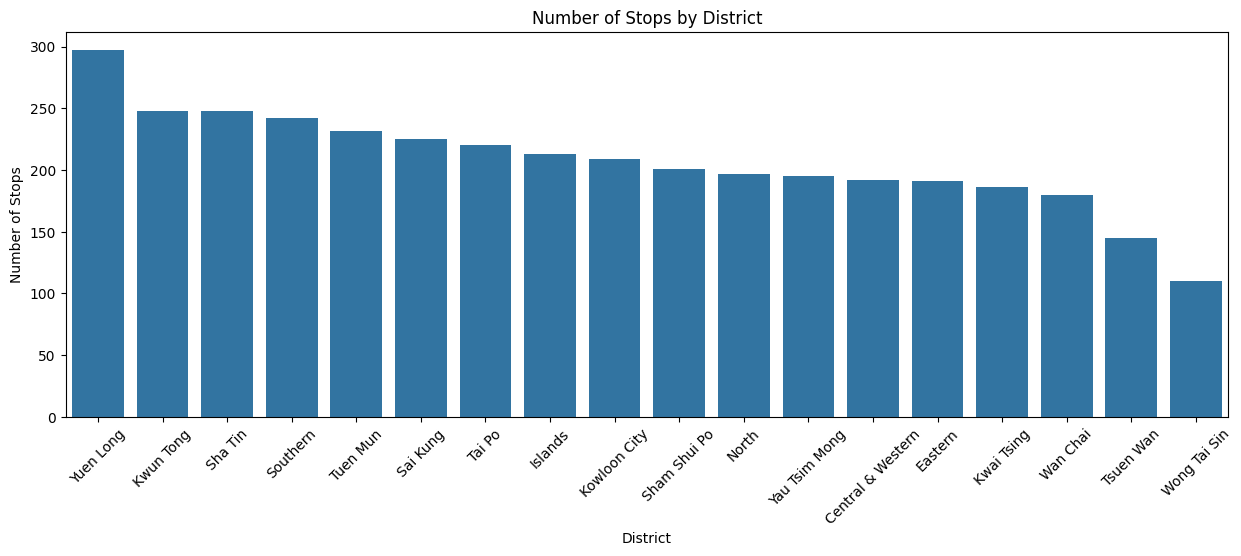

In [ ]:
# Step 1: Count unique ROUTE_IDs for each district
route_count = stops_district.groupby('District')['STOP_ID'].nunique().reset_index()
route_count.columns = ['District', 'Number_of_Routes']

# Step 2: Sort the route count in descending order
route_count = route_count.sort_values(by='Number_of_Routes', ascending=False)

# Step 3: Visualization
plt.figure(figsize=(15, 5))
sns.barplot(x='District', y='Number_of_Routes', data=route_count, palette=None)  # Set palette to None for no color
plt.title('Number of Stops by District')
plt.xlabel('District')
plt.ylabel('Number of Stops')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Remove gridlines
plt.grid(False)

plt.show()

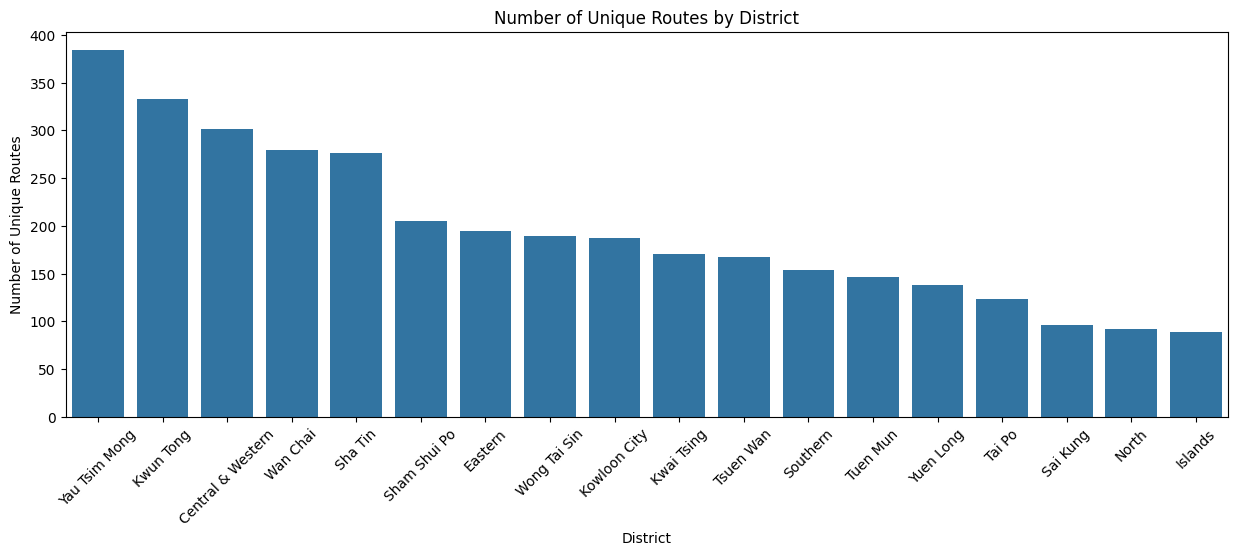

In [ ]:
# Step 1: Count unique ROUTE_IDs for each district
route_count = stops_district.groupby('District')['ROUTE_ID'].nunique().reset_index()
route_count.columns = ['District', 'Number_of_Routes']

# Step 2: Sort the route count in descending order
route_count = route_count.sort_values(by='Number_of_Routes', ascending=False)

# Step 3: Visualization
plt.figure(figsize=(15, 5))
sns.barplot(x='District', y='Number_of_Routes', data=route_count, palette=None)  # Set palette to None for no color
plt.title('Number of Unique Routes by District')
plt.xlabel('District')
plt.ylabel('Number of Unique Routes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Remove gridlines
plt.grid(False)

plt.show()

             District  Number_of_Distinct_Stops  Average_Fare_per_km
0   Central & Western                       302             5.170325
1             Eastern                       195             4.571082
2             Islands                        89             3.757621
3        Kowloon City                       187             4.464155
4          Kwai Tsing                       171             4.228435
5           Kwun Tong                       333             4.707568
6               North                        92             4.960951
7            Sai Kung                        96             5.175970
8             Sha Tin                       276             4.211405
9        Sham Shui Po                       205             4.544039
10           Southern                       154             4.599146
11             Tai Po                       124             4.700605
12          Tsuen Wan                       168             4.128664
13           Tuen Mun             

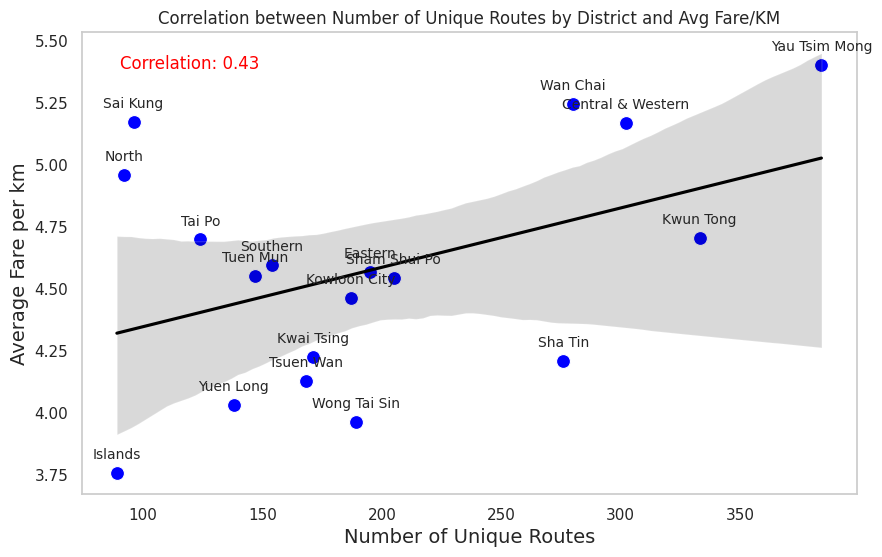

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming stops_district and gdf_stops are already defined and populated DataFrames

# Step 1: Count distinct stops and calculate average fare per kilometer
unique_routes = stops_district.groupby('District')['ROUTE_ID'].nunique().reset_index()
average_fare = gdf_stops.groupby('District')['Fare_per_km'].mean().reset_index()

# Step 2: Merge the two DataFrames
correlation_data = pd.merge(unique_routes, average_fare, on='District')
correlation_data.columns = ['District', 'Number_of_Distinct_Stops', 'Average_Fare_per_km']

# Step 3: Calculate correlation
correlation = correlation_data['Number_of_Distinct_Stops'].corr(correlation_data['Average_Fare_per_km'])

# Display results
print(correlation_data)
print(f'Correlation between Number of Distinct Stops and Average Fare per km: {correlation:.2f}')

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=correlation_data, x='Number_of_Distinct_Stops', y='Average_Fare_per_km', color='blue', s=100)

# Add a regression line
sns.regplot(data=correlation_data, x='Number_of_Distinct_Stops', y='Average_Fare_per_km', scatter=False, color='black')

# Set titles and labels
plt.title('Correlation between Number of Unique Routes by District and Avg Fare/KM')
plt.xlabel('Number of Unique Routes', fontsize=14)
plt.ylabel('Average Fare per km', fontsize=14)
plt.grid()

# Adding district names as labels
for i in range(len(correlation_data)):
    plt.annotate(correlation_data['District'][i],
                 (correlation_data['Number_of_Distinct_Stops'][i], correlation_data['Average_Fare_per_km'][i]),
                 textcoords="offset points",  # how to position the text
                 xytext=(0,10),  # distance from text to points (x,y)
                 ha='center',
                 fontsize=10)
# Annotate the correlation value on the plot
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',color='red')

# Show the plot
plt.show()

### b. Bus stop density


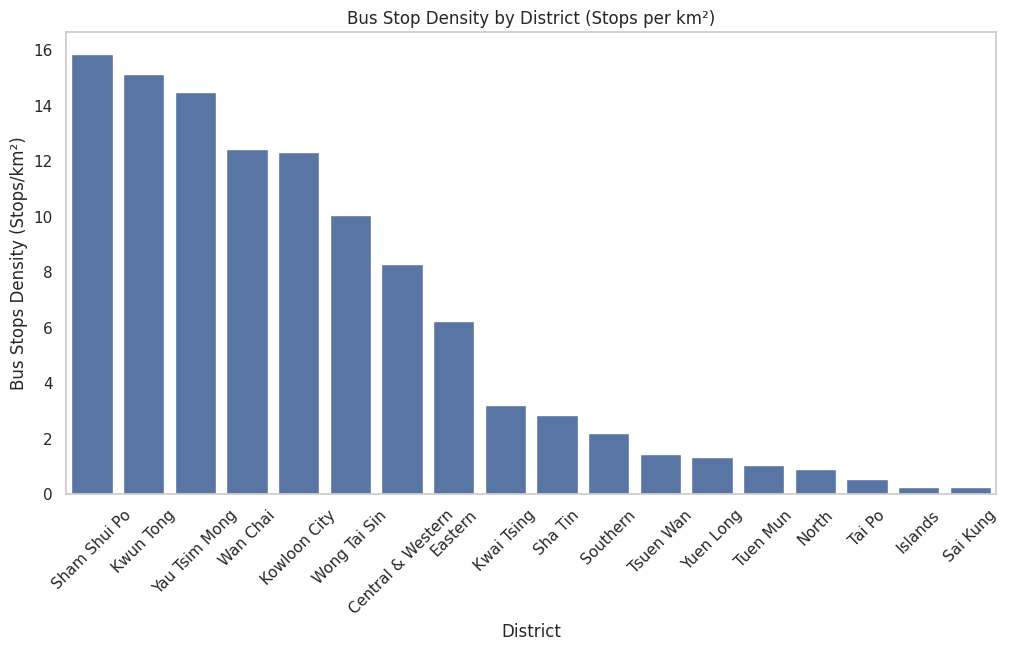

             District  Number_of_Stops          Area    Density
9        Sham Shui Po              201  1.268164e+07  15.849682
5           Kwun Tong              248  1.639268e+07  15.128700
16      Yau Tsim Mong              195  1.345000e+07  14.498140
14           Wan Chai              180  1.448224e+07  12.429020
3        Kowloon City              209  1.695796e+07  12.324593
15       Wong Tai Sin              110  1.092631e+07  10.067439
0   Central & Western              192  2.318177e+07   8.282371
1             Eastern              191  3.061780e+07   6.238200
4          Kwai Tsing              186  5.791949e+07   3.211354
8             Sha Tin              248  8.728962e+07   2.841117
10           Southern              242  1.102317e+08   2.195377
12          Tsuen Wan              145  9.901025e+07   1.464495
17          Yuen Long              297  2.204596e+08   1.347186
13           Tuen Mun              232  2.215529e+08   1.047154
6               North              197  

In [ ]:
# Step 1: Group by District and count the number of bus stops
stop_count = gdf_stops.groupby('District')['STOP_ID'].count().reset_index()
stop_count.columns = ['District', 'Number_of_Stops']

# Step 2: Sum the area for each district (using mean area for simplicity)
area_sum = gdf_stops.groupby('District')['Area'].mean().reset_index()  # Use mean area for simplicity

# Step 3: Merge stop count and area dataframes
density_data = pd.merge(stop_count, area_sum, on='District')

# Step 4: Calculate the density (stops per square kilometer)
density_data['Density'] = density_data['Number_of_Stops'] / (density_data['Area'] / 1e6)  # Convert area from m² to km²

# Step 5: Sort the density gdf_stops in descending order
density_data = density_data.sort_values(by='Density', ascending=False)

# Step 6: Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='Density', data=density_data, order=density_data['District'])
plt.title('Bus Stop Density by District (Stops per km²)')
plt.xlabel('District')
plt.ylabel('Bus Stops Density (Stops/km²)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()

# Display the resulting DataFrame
print(density_data[['District', 'Number_of_Stops', 'Area', 'Density']])

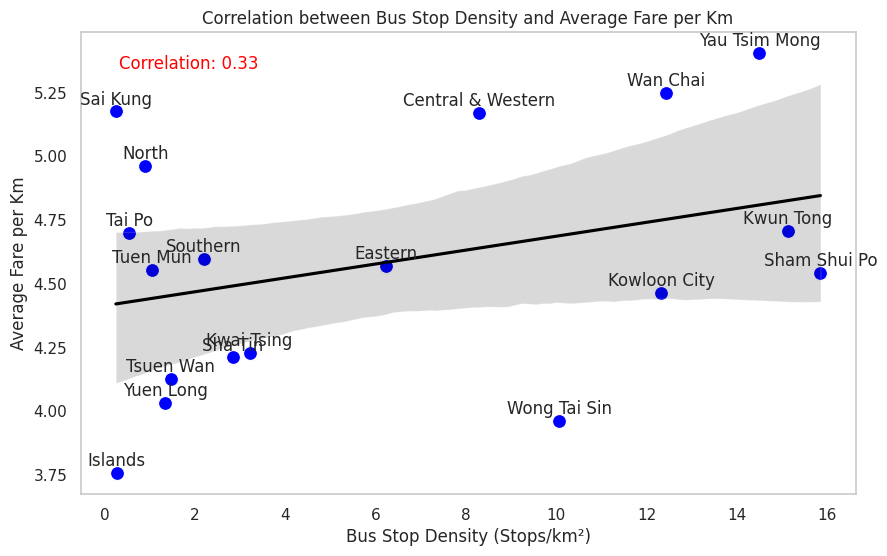

             District  Number_of_Stops          Area    Density  Average_Fare
0   Central & Western              192  2.318177e+07   8.282371      5.170325
1             Eastern              191  3.061780e+07   6.238200      4.571082
2             Islands              213  7.795263e+08   0.273243      3.757621
3        Kowloon City              209  1.695796e+07  12.324593      4.464155
4          Kwai Tsing              186  5.791949e+07   3.211354      4.228435
5           Kwun Tong              248  1.639268e+07  15.128700      4.707568
6               North              197  2.185015e+08   0.901596      4.960951
7            Sai Kung              225  8.996730e+08   0.250091      5.175970
8             Sha Tin              248  8.728962e+07   2.841117      4.211405
9        Sham Shui Po              201  1.268164e+07  15.849682      4.544039
10           Southern              242  1.102317e+08   2.195377      4.599146
11             Tai Po              220  4.018575e+08   0.547458 

In [ ]:
# Convert Area to numeric (in square meters)
gdf_stops['Area'] = pd.to_numeric(gdf_stops['Area'], errors='coerce')

# Step 1: Group by District and count the number of bus stops
stop_count = gdf_stops.groupby('District')['STOP_ID'].count().reset_index()
stop_count.columns = ['District', 'Number_of_Stops']

# Step 2: Sum the area for each district (using mean area for simplicity)
area_sum = gdf_stops.groupby('District')['Area'].mean().reset_index()  # Use mean area for simplicity

# Step 3: Merge stop count and area dataframes
density_data = pd.merge(stop_count, area_sum, on='District')

# Step 4: Calculate the density (stops per square kilometer)
density_data['Density'] = density_data['Number_of_Stops'] / (density_data['Area'] / 1e6)  # Convert area from m² to km²

# Step 5: Calculate the average fare per district
fare_avg = gdf_stops.groupby('District')['Fare_per_km'].mean().reset_index()
fare_avg.columns = ['District', 'Average_Fare']

# Step 6: Merge density gdf_stops with average fare dataframes
density_data = pd.merge(density_data, fare_avg, on='District')

# Step 7: Calculate correlation between Density and Average Fare
correlation = density_data[['Density', 'Average_Fare']].corr().iloc[0, 1]

# Visualization of the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Density', y='Average_Fare', data=density_data, color='blue', s=100)

# Add a regression line
sns.regplot(x='Density', y='Average_Fare', data=density_data, scatter=False, color='black')

# Annotate the correlation value on the plot
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',color='red')

# Annotate with district names
for i in range(density_data.shape[0]):
    plt.annotate(density_data['District'].iloc[i],
                 (density_data['Density'].iloc[i], density_data['Average_Fare'].iloc[i]),
                 textcoords="offset points",
                 xytext=(0, 5),  # Adjust the position of the text
                 ha='center')

# Set titles and labels
plt.title('Correlation between Bus Stop Density and Average Fare per Km')
plt.xlabel('Bus Stop Density (Stops/km²)')
plt.ylabel('Average Fare per Km')
plt.grid()
plt.show()

# Print the resulting DataFrame and correlation value
print(density_data[['District', 'Number_of_Stops', 'Area', 'Density', 'Average_Fare']])
print(f'Correlation between Bus Stop Density and Average Fare per Km: {correlation:.2f}')

### c. Fare boxplot


             District  Fare_per_km
16      Yau Tsim Mong     5.403844
14           Wan Chai     5.248448
7            Sai Kung     5.175970
0   Central & Western     5.170325
6               North     4.960951
5           Kwun Tong     4.707568
11             Tai Po     4.700605
10           Southern     4.599146
1             Eastern     4.571082
13           Tuen Mun     4.555059
9        Sham Shui Po     4.544039
3        Kowloon City     4.464155
4          Kwai Tsing     4.228435
8             Sha Tin     4.211405
12          Tsuen Wan     4.128664
17          Yuen Long     4.032788
15       Wong Tai Sin     3.964303
2             Islands     3.757621


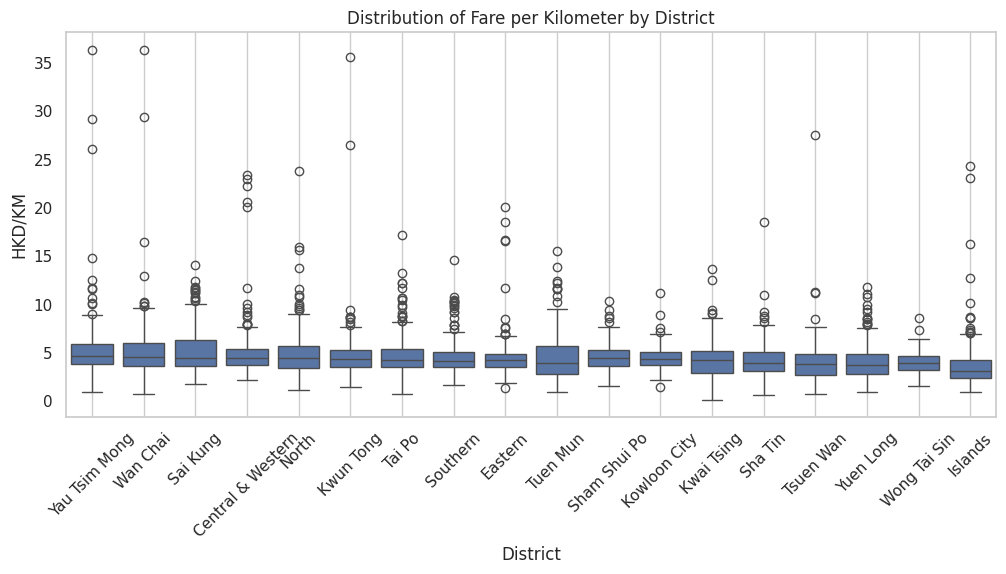

In [ ]:
# Assuming gdf_stops is your DataFrame
# Calculate average fare per kilometer by district without removing outliers
average_fare = gdf_stops.groupby('District')['Fare_per_km'].mean().reset_index()

# Sort the average fare from highest to lowest
average_fare = average_fare.sort_values(by='Fare_per_km', ascending=False)

# Print average fare without outliers, sorted
print(average_fare)

# Plotting distribution of fares per kilometer by district
plt.figure(figsize=(12, 5))
sns.boxplot(x='District', y='Fare_per_km', data=gdf_stops, order=average_fare['District'])
plt.title('Distribution of Fare per Kilometer by District')
plt.xlabel('District')
plt.ylabel('HKD/KM')
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## Socioeconomics data

In [ ]:
average_fares = gdf_stops.groupby('District')['Fare_per_km'].mean().reset_index()

# Renaming the columns for clarity
average_fares.columns = ['District', 'Average_Fare_per_km']
average_fares = average_fares.sort_values(by='Average_Fare_per_km', ascending=False)
average_fares = average_fares.reset_index(drop=True)


# Display the result
print(average_fares)

             District  Average_Fare_per_km
0       Yau Tsim Mong             5.403844
1            Wan Chai             5.248448
2            Sai Kung             5.175970
3   Central & Western             5.170325
4               North             4.960951
5           Kwun Tong             4.707568
6              Tai Po             4.700605
7            Southern             4.599146
8             Eastern             4.571082
9            Tuen Mun             4.555059
10       Sham Shui Po             4.544039
11       Kowloon City             4.464155
12         Kwai Tsing             4.228435
13            Sha Tin             4.211405
14          Tsuen Wan             4.128664
15          Yuen Long             4.032788
16       Wong Tai Sin             3.964303
17            Islands             3.757621


In [ ]:
economics = pd.read_excel('/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/Socioeconomic/ECONOMICS.xlsx')
economics.head()

,year,dc_class,dc,dc_eng,dc_chi,dh,dhz_1,dhz_2,dhz_3,dhz_4,...,lfpr_age_3_m_xfdh,lfpr_age_4_m_xfdh,lfpr_age_5_m_xfdh,lfpr_age_6_m_xfdh,lfpr_age_1_f_xfdh,lfpr_age_2_f_xfdh,lfpr_age_3_f_xfdh,lfpr_age_4_f_xfdh,lfpr_age_5_f_xfdh,lfpr_age_6_f_xfdh
0,2016,A,11,Central and Western,中西區,84700,18800,26100,15400,14400,...,93.7,97.4,93.0,51.3,38.3,75.4,84.0,72.0,71.2,25.4
1,2016,B,12,Wan Chai,灣仔區,65300,17200,17400,13200,9600,...,97.7,96.4,93.8,50.9,42.9,74.2,86.2,67.7,69.0,23.9
2,2016,C,13,Eastern,東區,186700,33100,48700,43800,37300,...,95.1,97.8,91.8,42.5,40.1,76.9,85.6,75.1,71.8,21.7
3,2016,D,14,Southern,南區,84900,12500,20800,20400,18800,...,97.4,96.6,95.5,47.0,36.4,73.4,82.2,69.7,69.8,24.2
4,2016,E,27,Yau Tsim Mong,油尖旺區,126400,31000,38400,24100,20100,...,90.9,94.5,92.1,51.1,38.6,70.5,74.5,63.5,73.3,25.4


### Only keep the columns needed for analyzing



In [ ]:
df_economics = pd.DataFrame(economics)
# Specify the columns to keep
columns_to_keep = ['year', 'dc_eng', 'ma_hh']

# Create a new DataFrame with only the specified columns
Income_median = df_economics[columns_to_keep]

Income_median = Income_median.rename(columns={'dc_eng': 'District', 'ma_hh': 'Income_median'})
Income_median = Income_median[Income_median['District'] != 'Land total']

# Display the new DataFrame
print(Income_median)

     year             District  Income_median
0    2016  Central and Western          39500
1    2016             Wan Chai          40000
2    2016              Eastern          31300
3    2016             Southern          30700
4    2016        Yau Tsim Mong          25800
..    ...                  ...            ...
146  2023                North          25500
147  2023               Tai Po          31700
148  2023              Sha Tin          30500
149  2023             Sai Kung          40400
150  2023              Islands          31500

[144 rows x 3 columns]


### Separate DataFrame by Year

In [ ]:
# Separate DataFrame by year
years = Income_median['year'].unique()

for year in years:
    # Create a variable name dynamically
    globals()[f'Income_median_{year}'] = Income_median[Income_median['year'] == year].drop(columns=['year']).set_index('District')

# Display the separated DataFrames

print("\nIncome_median_2022:")
print(Income_median_2022)



Income_median_2022:
                     Income_median
District                          
Central and Western          42300
Wan Chai                     41800
Eastern                      31500
Southern                     34200
Yau Tsim Mong                29000
Sham Shui Po                 22800
Kowloon City                 30000
Wong Tai Sin                 24400
Kwun Tong                    22100
Kwai Tsing                   24300
Tsuen Wan                    32300
Tuen Mun                     25800
Yuen Long                    28900
North                        24400
Tai Po                       30200
Sha Tin                      29700
Sai Kung                     40000
Islands                      29400


### Find the correlation between the average fares and the income median

Correlation Matrix:
                     Average_Fare_per_km  Income_median
Average_Fare_per_km             1.000000       0.379383
Income_median                   0.379383       1.000000


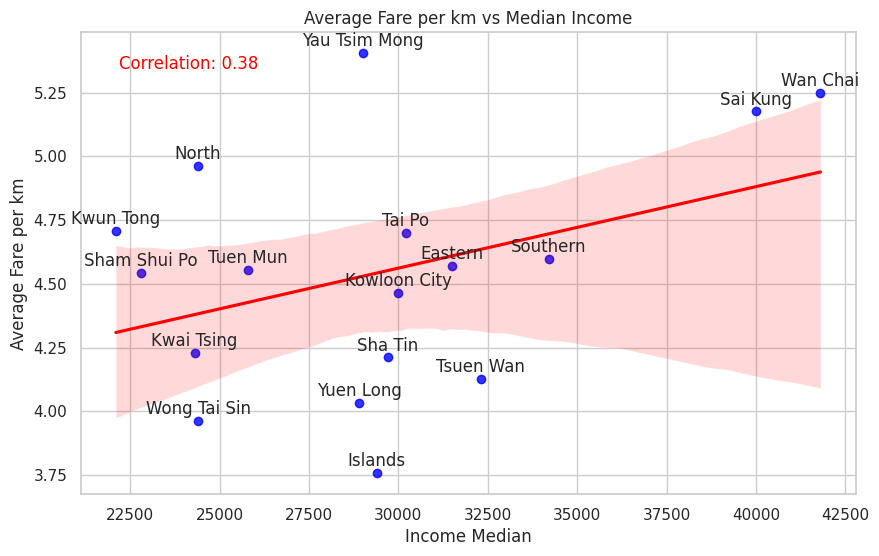

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merging the DataFrames on the 'District' column
merged_fares_income = pd.merge(average_fares, Income_median_2022, on='District')

# Calculating the correlation between Average_Fare_per_km and Median_Income
correlation_fares_income = merged_fares_income[['Average_Fare_per_km', 'Income_median']].corr()

# Get the correlation coefficient as a scalar value
correlation_value = correlation_fares_income.loc['Average_Fare_per_km', 'Income_median']

# Display the correlation result
print("Correlation Matrix:")
print(correlation_fares_income)

# Plotting the regression
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_fares_income, x='Income_median', y='Average_Fare_per_km',
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Annotating each point with the District name
for i in range(len(merged_fares_income)):
    plt.annotate(merged_fares_income['District'].iloc[i],
                 (merged_fares_income['Income_median'].iloc[i], merged_fares_income['Average_Fare_per_km'].iloc[i]),
                 textcoords="offset points",  # How to position the text
                 xytext=(0,5),  # Distance from the point (x,y)
                 ha='center')

# Annotate the correlation value on the plot
plt.text(0.05, 0.95, f'Correlation: {correlation_value:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', color='red')

plt.title('Average Fare per km vs Median Income')
plt.xlabel('Income Median')
plt.ylabel('Average Fare per km')
plt.grid(True)
plt.show()

### Load population density file

In [ ]:
population_density_file = pd.read_excel('/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/Socioeconomic/POPULATION_2022.xlsx')
population_density_file.head()

,DC,DC_ENG,DC_CHI,PERIOD,LA,MYPOPN_LAND,POPN_D
0,11,Central and Western,中西區,2022,12.55,223.6,17820
1,12,Wan Chai,灣仔區,2022,10.56,158.1,14970
2,13,Eastern,東區,2022,17.99,518.2,28810
3,14,Southern,南區,2022,38.84,257.0,6620
4,27,Yau Tsim Mong,油尖旺區,2022,6.99,296.3,42400


In [ ]:
population_density = pd.DataFrame(population_density_file)
# Specify the columns to keep
columns_to_keep = ['DC_ENG', 'POPN_D']

# Create a new DataFrame with only the specified columns
population_density = population_density[columns_to_keep]
population_density = population_density.iloc[:-1]

population_density = population_density.sort_values(by='POPN_D', ascending=False)
population_density = population_density.rename(columns={'DC_ENG': 'District', 'POPN_D': 'Population_Density'})
print(population_density)

               District  Population_Density
8             Kwun Tong               59340
5          Sham Shui Po               46220
7          Wong Tai Sin               43480
4         Yau Tsim Mong               42400
6          Kowloon City               40310
2               Eastern               28810
9            Kwai Tsing               21040
0   Central and Western               17820
1              Wan Chai               14970
15              Sha Tin               10020
3              Southern                6620
11             Tuen Mun                5930
10            Tsuen Wan                5020
12            Yuen Long                4750
16             Sai Kung                3800
13                North                2460
14               Tai Po                2310
17              Islands                1000


## Find the correlation between the average fares and the population density

                     Average_Fare_per_km  Population_Density
Average_Fare_per_km             1.000000            0.124219
Population_Density              0.124219            1.000000


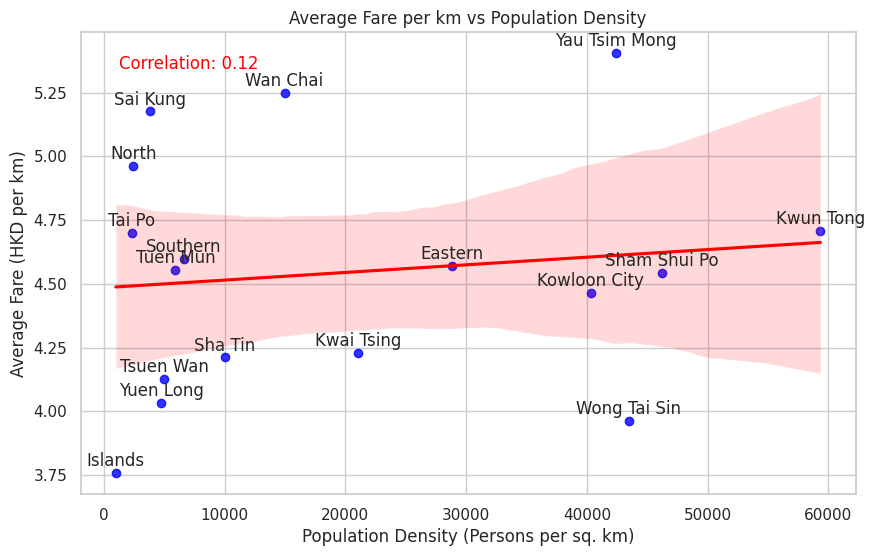

In [ ]:
# Merging the DataFrames on the 'District' column
merged_fares_density = pd.merge(average_fares, population_density, on='District')

# Calculating the correlation between Average_Fare_per_km and Median_Income
correlation_fares_density= merged_fares_density[['Average_Fare_per_km', 'Population_Density']].corr()

# Display the correlation result
print(correlation_fares_density)
# Get the correlation coefficient as a scalar value
correlation_value = correlation_fares_density.loc['Average_Fare_per_km', 'Population_Density']
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_fares_density, x='Population_Density', y='Average_Fare_per_km',
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

for i in range(len(merged_fares_density)):
    plt.annotate(merged_fares_density['District'].iloc[i],
                 (merged_fares_density['Population_Density'].iloc[i], merged_fares_density['Average_Fare_per_km'].iloc[i]),
                 textcoords="offset points",  # How to position the text
                 xytext=(0,5),  # Distance from the point (x,y)
                 ha='center')

# Annotate the correlation value on the plot
plt.text(0.05, 0.95, f'Correlation: {correlation_value:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', color='red')
plt.title('Average Fare per km vs Population Density')
plt.xlabel('Population Density (Persons per sq. km)')
plt.ylabel('Average Fare (HKD per km)')
plt.grid(True)
plt.show()

In [ ]:
# Specify the columns to keep

pctn_of_working_age = df_economics

pctn_of_working_age['working_age_pctn'] = (pctn_of_working_age['lbnp_age_2pctn'] +
                        pctn_of_working_age['lbnp_age_3pctn'] +
                        pctn_of_working_age['lbnp_age_4pctn'] +
                        pctn_of_working_age['lbnp_age_5pctn'] +
                        pctn_of_working_age['lbnp_age_6pctn'] +
                        pctn_of_working_age['lbnp_age_7pctn'])

columns_to_keep = ['year', 'dc_eng', 'working_age_pctn']

pctn_of_working_age = pctn_of_working_age[columns_to_keep]

# Display the updated DataFrame
print(pctn_of_working_age)

     year               dc_eng  working_age_pctn
0    2016  Central and Western             139.3
1    2016             Wan Chai             141.3
2    2016              Eastern             135.4
3    2016             Southern             137.4
4    2016        Yau Tsim Mong             138.3
..    ...                  ...               ...
147  2023               Tai Po             129.3
148  2023              Sha Tin             125.9
149  2023             Sai Kung             135.1
150  2023              Islands             133.7
151  2023           Land total             128.4

[152 rows x 3 columns]


## MTR DATASET

In [ ]:
pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=1390fea87755ca049e316ba73db06d5a5a7edc7a1b2a73e2f64786a593d788c1
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [ ]:
import wikipedia
import numpy as np
import requests
from bs4 import BeautifulSoup

import pandas as pd

mtr_routes = pd.read_csv('/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/mtr_lines_fares.csv')

mtr_routes = mtr_routes[['SRC_STATION_NAME', 'SRC_STATION_ID', 'DEST_STATION_NAME', 'DEST_STATION_ID', 'OCT_ADT_FARE']]
mtr_routes = mtr_routes.loc[mtr_routes['SRC_STATION_NAME'] == 'Central']
#print(mtr_routes)


# URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_MTR_stations'

# Send a GET request to the page
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all tables on the page
tables = soup.find_all('table', class_='wikitable')

# Initialize a list to store all links
all_links = []

# Loop through each table
for table in tables:
    # Find all links in the current table
    links = table.find_all('a')
    for link in links:
        href = link.get('href')
        if href and href.startswith('/wiki/') and not href.startswith('/wiki/File') and 'station' in href:
            all_links.append('https://en.wikipedia.org' + href)

link_dataframe = pd.DataFrame(all_links, columns=['Numbers'])
coordinates = []
for link in all_links:
    response = requests.get(link)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find latitude and longitude
    latitude = soup.find("span", {"class": "latitude"})
    longitude = soup.find("span", {"class": "longitude"})
    coordinates.append(tuple[latitude.text, longitude.text])

coordinates_dataset = pd.DataFrame(coordinates, columns=['Coordinates'])
link_dataframe = link_dataframe.join(coordinates_dataset)
print(link_dataframe)

                                               Numbers  \
0    https://en.wikipedia.org/wiki/Admiralty_statio...   
1    https://en.wikipedia.org/wiki/Exhibition_Centr...   
2       https://en.wikipedia.org/wiki/Hung_Hom_station   
3    https://en.wikipedia.org/wiki/Mong_Kok_East_st...   
4    https://en.wikipedia.org/wiki/Kowloon_Tong_sta...   
..                                                 ...   
122  https://en.wikipedia.org/wiki/South_Horizons_s...   
123     https://en.wikipedia.org/wiki/Lei_Tung_station   
124  https://en.wikipedia.org/wiki/Wong_Chuk_Hang_s...   
125   https://en.wikipedia.org/wiki/Ocean_Park_station   
126  https://en.wikipedia.org/wiki/Admiralty_statio...   

                             Coordinates  
0    *tuple['22°16′44″N', '114°09′53″E']  
1    *tuple['22°16′54″N', '114°10′31″E']  
2    *tuple['22°18′10″N', '114°10′54″E']  
3    *tuple['22°19′20″N', '114°10′22″E']  
4    *tuple['22°20′13″N', '114°10′34″E']  
..                                   ...  
12

In [ ]:
pip install haversine

In [ ]:
import wikipedia
import numpy as np
import requests
from bs4 import BeautifulSoup
from geopy.distance import geodesic
import matplotlib.pyplot as plt

import pandas as pd

mtr_routes = pd.read_csv('/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/mtr_lines_fares.csv')

mtr_routes = mtr_routes[['SRC_STATION_NAME', 'SRC_STATION_ID', 'DEST_STATION_NAME', 'DEST_STATION_ID', 'OCT_ADT_FARE']]
mtr_routes = mtr_routes.loc[mtr_routes['SRC_STATION_NAME'] == 'Central']

mtr_coords = pd.read_csv('/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/modified_lines_and_stations.csv')
mtr_coords = mtr_coords[['English Name', 'Lat', 'Long']]

mtr_coords = mtr_coords.drop_duplicates()
mtr_coords.rename(columns={'English Name': 'DEST_STATION_NAME', 'Lat': 'Lat', 'Long': 'Long'}, inplace=True)


def calculate_distance(row):
    station_coords = (row['Lat'], row['Long'])
    central_coords = (22.282, 114.1576)
    return geodesic(central_coords, station_coords).kilometers

# Add the distance column
mtr_coords['distance_km'] = mtr_coords.apply(calculate_distance, axis=1)

merged_df = pd.merge(mtr_routes, mtr_coords, on='DEST_STATION_NAME')
merged_df['Fare_Per_Distance'] = merged_df.apply(lambda row: row['OCT_ADT_FARE'] / row['distance_km'] if row['distance_km'] > 0 else None, axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['distance_km'], merged_df['OCT_ADT_FARE'], color='blue', label='Price vs Distance')

z = np.polyfit(merged_df['distance_km'], merged_df['OCT_ADT_FARE'], 1)  # 1 indicates a linear fit
p = np.poly1d(z)

# Plot the line of best fit
plt.plot(merged_df['distance_km'], p(merged_df['distance_km']), color='red', linestyle='--', label='Line of Best Fit')
# Add labels and title
plt.title('MTR Price vs Distance (from Central)')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [ ]:
merged_sorted = merged_df.sort_values(by='distance_km')
plt.figure(figsize=(20, 6))
plt.bar(merged_sorted['DEST_STATION_NAME'], merged_sorted['Fare_Per_Distance'], color='lightgreen')
plt.title('Fare Per Kilometer for Each Station')
plt.xlabel('Station')
plt.ylabel('Fare Per KM')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import json

# Load the JSON data from the file
with open('/content/drive/MyDrive/REAL LIFE DATA SCIENCE/Data/hksar_18_district_boundary.json', 'r', encoding='utf-8') as file:
    json_data = json.load(file)

# Extract district data from the JSON
district_data = []
for feature in json_data['features']:
    district_name = feature['properties']['District']
    coords = feature['geometry']['coordinates'][0]  # Assuming the first set of coordinates is the correct one
    district_data.append({
        "District": district_name,
        "coordinates": [(lon, lat) for lon, lat in coords]
    })

# Convert the district data into polygons
district_polygons = []
for district in district_data:
    coords = district['coordinates']
    polygon = Polygon(coords)
    district_polygons.append((district['District'], polygon))

# Create a GeoDataFrame for districts
gdf_districts = gpd.GeoDataFrame(district_polygons, columns=['District', 'geometry'])

# Create a GeoDataFrame for stops
geometry = [Point(lon, lat) for lon, lat in zip(merged_df['Long'], merged_df['Lat'])]
gdf_stops = gpd.GeoDataFrame(merged_df, geometry=geometry)

# Check which stops fall within each district
gdf_stops['District'] = None
for idx, stop in gdf_stops.iterrows():
    point = stop.geometry
    for _, district in gdf_districts.iterrows():
        if district.geometry.contains(point):  # Check if the point is in the polygon
            gdf_stops.at[idx, 'District'] = district['District']
            break

# Print results
gdf_stops = gdf_stops[['DEST_STATION_NAME','OCT_ADT_FARE', 'distance_km','Lat', 'Long', 'District', 'Fare_Per_Distance']]

station_counts = gdf_stops['District'].value_counts()

# Create a bar graph
plt.figure(figsize=(10, 6))
station_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Train Stations in Each District')
plt.xlabel('District')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
merged_sorted = gdf_stops.sort_values(by='distance_km')
unique_districts = merged_sorted['District'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_districts)))  # Using a colormap

district_color_mapping = dict(zip(unique_districts, colors))

# Assign colors based on district
merged_sorted['Color'] = merged_sorted['District'].map(district_color_mapping)

plt.figure(figsize=(20, 6))
plt.bar(merged_sorted['DEST_STATION_NAME'], merged_sorted['Fare_Per_Distance'], color='lightgreen')
plt.title('Fare Per Kilometer for Each Station')
plt.xlabel('Station')
plt.ylabel('Fare Per KM')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()